In [1]:
import os
import sys
sys.path.insert(0, "/home/mohan/Projects")
import numpy as np 
from matplotlib import pyplot as plt
from albatros_analysis.utils import baseband_utils as butils
from scio import scio
import subprocess
from albatros_analysis.orbcomm import generate_phases
from albatros_analysis.utils import orbcomm_utils as satutils

In [3]:
butils.get_file_from_timestamp("1627523470","/home/mohan/Projects/direct/", 'd')

FileNotFoundError: No file match for requested timestamp. Perhaps there was a data acquisition gap. Use force_ts = True.

In [2]:
path="/home/mohan/Projects/direct/16275/1627503459"
pol00=scio.read(os.path.join(path,'pol00.scio.bz2'))

crossings []
num of segments 1
boundaries [  0 560]
OFF
crossings []
num of segments 1
boundaries [  0 560]
OFF
crossings []
num of segments 1
boundaries [  0 560]
OFF
crossings []
num of segments 1
boundaries [  0 560]
OFF
crossings [233 306]
num of segments 3
boundaries [  0 233 306 560]
OFF
crossings [  4 117 330 445]
num of segments 5
boundaries [  0   4 117 330 445 560]
OFF
crossings [ 29 109 258 300 357 439]
num of segments 7
boundaries [  0  29 109 258 300 357 439 560]
OFF
crossings [254 305]
num of segments 3
boundaries [  0 254 305 560]
OFF
crossings [ 30  93 355 419]
num of segments 5
boundaries [  0  30  93 355 419 560]
OFF
crossings [64 81]
num of segments 3
boundaries [  0  64  81 560]
OFF
crossings []
num of segments 1
boundaries [  0 560]
OFF
crossings []
num of segments 1
boundaries [  0 560]
OFF
crossings [ 21  94 348 419]
num of segments 5
boundaries [  0  21  94 348 419 560]
OFF
crossings [  5 119 329 447]
num of segments 5
boundaries [  0   5 119 329 447 560]
OFF
cr

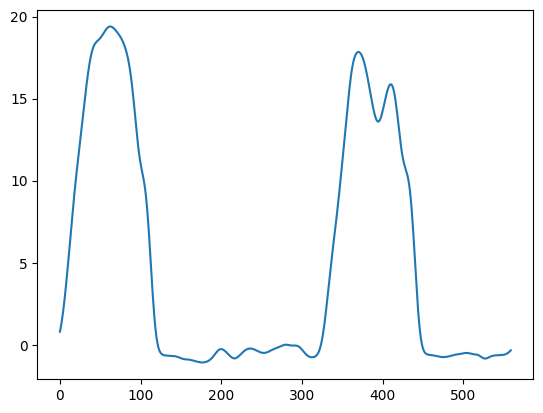

In [59]:
transits=generate_phases.find_single_sat_transits(pol00[:,1834:1854].copy(),snr_thresh=2)

In [4]:
transits

{0: [],
 1: [],
 2: [],
 3: [],
 4: [[238, 304]],
 5: [[7, 116], [332, 443]],
 6: [[36, 100], [265, 289], [364, 387], [394, 429]],
 7: [[259, 302]],
 8: [[35, 89], [360, 383], [408, 413]],
 9: [],
 10: [],
 11: [],
 12: [[25, 90], [352, 392], [407, 411]],
 13: [[8, 117], [332, 445]],
 14: [],
 15: [],
 16: [[184, 213]],
 17: [],
 18: [],
 19: []}

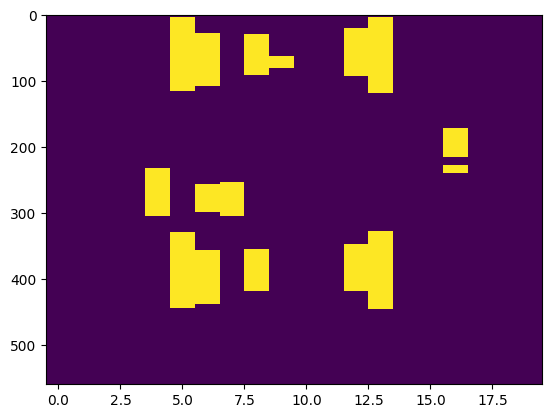

In [60]:
passes = np.zeros((pol00.shape[0],20),dtype=bool)
for c in range(0,20):
    for t in transits[c]:
        if t[1] - t[0] > 10:
            passes[t[0]:t[1],c] = 1
plt.imshow(passes,aspect='auto',interpolation='none')

In [61]:
x = np.arange(19,-1,-1,dtype=int).reshape(20,-1)
pwr = 2**(np.ones(560,dtype=int).reshape(560,1)@x.T)

In [ ]:
pwr

In [62]:
rep=np.sum(passes*pwr,axis=1)

In [ ]:
unq_val, unq_idx, counts = np.unique(rep,return_index=True,return_counts=True)

In [ ]:
np.where(rep.any()==unq_val[counts<=5])

In [56]:
def get_simul_pulses(arr, thresh=5):
    cur = 0
    curidx = 0
    curlen = 0
    pulses = []
    for i, x in enumerate(arr):
#         print(i, x)
        if x != cur:
            if curlen > thresh and cur > 0:
                pulses.append([[curidx,i], get_set_bits(cur,reverse=True)])
            cur = x
            curlen = 0
            curidx = i
        else:
            curlen += 1
    return pulses

In [63]:
simul_pulses = get_simul_pulses(rep)

In [64]:
simul_pulses

[[[5, 21], [13, 5]],
 [[21, 29], [13, 12, 5]],
 [[30, 64], [13, 12, 8, 6, 5]],
 [[64, 81], [13, 12, 9, 8, 6, 5]],
 [[81, 93], [13, 12, 8, 6, 5]],
 [[94, 109], [13, 6, 5]],
 [[109, 117], [13, 5]],
 [[172, 217], [16]],
 [[233, 241], [16, 4]],
 [[241, 254], [4]],
 [[258, 300], [7, 6, 4]],
 [[330, 348], [13, 5]],
 [[348, 355], [13, 12, 5]],
 [[357, 419], [13, 12, 8, 6, 5]],
 [[419, 439], [13, 6, 5]]]

In [14]:
t_start = 1627503459
coords = [51.4646065, -68.2352594, 341.052]
risen_sats = satutils.get_risen_sats(coords, t_start, dt=None, niter=560, altitude_cutoff=1)

starting at  1627503459 dt is 6.442450944


In [20]:
num_risen = np.asarray([len(a) for a in risen_sats])
ss_epochs = satutils.find_pulses(
        num_risen, cond="==", thresh=1
    )

crossings [ 49 128 150 231 258 314 327 456]
num of segments 9
boundaries [  0  49 128 150 231 258 314 327 456 560]
OFF


In [22]:
ss_epochs

[[49, 128], [150, 231], [258, 314], [327, 456]]

In [42]:
xx=np.asarray(simul_pulses)
np.argmax((xx[:,1]-xx[:,0])*xx[:,2])

2

In [46]:
np.sum((xx[:,1]-xx[:,0]))/560

0.5160714285714286

array([[    8,    25, 16448],
       [   25,    35, 16576],
       [   36,    89, 26816],
       [   90,   100, 24640],
       [  100,   116, 16448],
       [  184,   213,     8],
       [  238,   259, 32768],
       [  265,   289, 45056],
       [  289,   302, 36864],
       [  332,   352, 16448],
       [  352,   360, 16576],
       [  364,   383, 26816],
       [  394,   429, 24640],
       [  429,   443, 16448]])

In [52]:
def get_set_bits(x,nbits=20,reverse=False):
    if reverse:
        return [nbits-i-1 for i in range(0,nbits) if (x>>i)&1]
    return [i for i in range(0,nbits) if (x>>i)&1]
    

In [55]:
get_set_bits(2**19,reverse=True)

[0]

In [29]:
for p in simul_pulses:
    print(num_risen[p[0][0]:p[0][1]], p[1]) # remember that even if you see multiple sats risen and they seem to be overlapping
    # in channels, it's ok. in true channels, they are broadcasting in their own channels.a

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] [16448]
[2 2 2 2 2 2 2 2 2 2] [16576]
[2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [26816]
[1 1 1 1 1 1 1 1 1 1] [24640]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [16448]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [8]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1] [32768]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [45056]
[1 1 1 1 1 1 1 1 1 1 1 1 1] [36864]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [16448]
[1 1 1 1 1 1 1 1] [16576]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [26816]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [24640]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1] [16448]


In [ ]:
24640